<a href="https://colab.research.google.com/github/DSNortsev/Algorithms/blob/master/LeetCode_May_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Task1: Interval List Intersections**

In [ ]:
from typing import List, Tuple
def interval_list_intersaction(vector_a: Tuple[int], vector_b: Tuple[int]) -> List[Tuple[int]]:
  """
    Find all intersection between all vectors. All vectors are sorted 
    # sorted_vectors = sorted(vector, key = lamda k:k[0])
  """
  indx_a, indx_b = 0, 0 
  size_a = len(vector_a)
  size_b = len(vector_b)
  result = list()

  # Iterate over each element and stote the answer
  while (indx_a < size_a and indx_b < size_b):
    if vector_b[indx_b][0] <= vector_a[indx_a][1] and \
      vector_a[indx_a][0] <= vector_b[indx_b][1]:
      element1 = max(vector_a[indx_a][0], vector_b[indx_b][0])
      element2 = min(vector_a[indx_a][1], vector_b[indx_b][1])
      result.append([element1, element2])
    
    # Increment the index of pointer A or B
    if vector_a[indx_a][1] > vector_b[indx_b][1]:
      indx_b += 1
    else:
      indx_a += 1
  return result

In [ ]:
interval_a = [(0,2), (5,10), (13,23), (24,25)]
interval_b = [(1,5), (8,12), (15,24), (25,26)]

interval_list_intersaction(interval_a, interval_b)

[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

##**Task2: First bad version**

In [ ]:
def fist_bad_version(n: int) -> int:
  """
    Find nad version by using binary search
  """
  start = 0 
  end = n 
  result = n 

  while start <= end:
    mid = (start + end) // 2
    if is_bad_version(mid):
      result = mid
      end = mid - 1
    else:
      start = mid + 1
  return result

##**Task3: Jewels and stones**

In [ ]:
def num_jewels_in_stones(jewels: str, stones: str) -> int: 
  # Use set since the hash table is used for searching
  # O(1)
  jewels = set(jewels)
  count = 0

  for stone in stones:
    if stone in jewels:
      count += 1
  return count

##**Task4: Ransom note**

In [ ]:
def is_ransom_note_formed(ransom_note: str, magazine: str) -> bool:
  """
    Use dictionary (hasp map) to check if ransom note can be constructed
  """
  letters_count = dict()
  for letter in magazine:
    if letters_count.get(letter):
      letters_count[letter] += 1
    else:
       letters_count[letter] = 0

  for letter in ransom_note:
    if not letters_count.get(letter) or letters_count.get(letter) - 1 < 0 :
      return False
    letters_count[letter] -= 1
  return True

##**Task5: Number complement**

The complement of an integer is the integer you get when you flip all the 0's to 1's and all the 1's to 0's in its binary representation.

    For example, The integer 5 is "101" in binary and its complement is "010" which is the integer 2.

Given an integer num, return its complement.

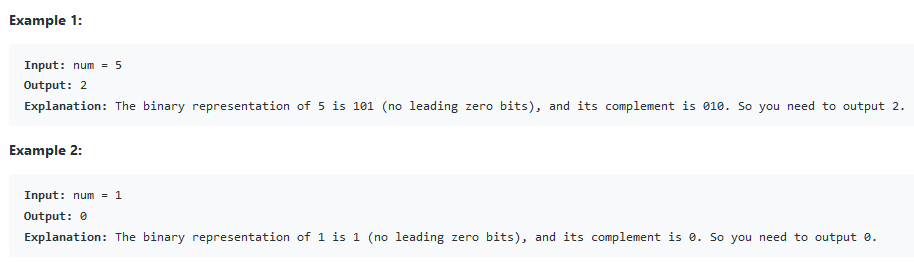

In [ ]:
def find_complement(num: int) -> int:
  """
    Convert to binary and slice the prefix of binary indication "0b"
  """
  num = list(str(bin(num)[2:]))
  for i,x in enumerate(num):
    if x == "0":
      num[i] = "1"
    elif x == "1":
      num[i] = "0"
  return(int("".join(num), 2))

In [ ]:
print(find_complement(10))
print(find_complement(5))
print(find_complement(1))
print(find_complement(0))

5
2
0
1


##**Task6: First unique characters in a string**

Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.

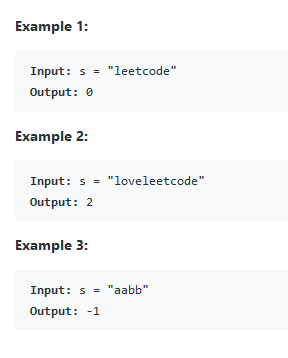

In [ ]:
def firts_uniq_char(string: str) -> int:
  """
    Find the first occurrence of unique character in string
  """
  occurrence = {}

  for char in string:
    if char in occurrence:
      occurrence[char] += 1
    else:
      occurrence[char] = 1

  for indx, char in enumerate(string):
    if occurrence[char] == 1:
      return indx
  return -1

In [ ]:
print(firts_uniq_char('leetcode'))
print(firts_uniq_char('loveleetcode'))
print(firts_uniq_char('aabb'))

0
2
-1


##**Task7: Majority element**

In [ ]:
def majaroty_elements(nums: list) -> int:
  """
    Find the majority element in the list which is greater than n/2.
    Majarity element is guaranteed 
  """
  majority = nums[0]
  count = 1

  for num in nums[1:]:
    if num == majority:
      count += 1
    else:
      count -= 1
      if count == 0:
        majority = num
        count = 1
  return majority

In [ ]:
print(majaroty_elements([3,2,3]))
print(majaroty_elements([2,2,1,1,1,2,2]))

3
2


##**Task8: Cousins in a binary tree**

In [ ]:
from typing import Tuple
def find_height(current: TreeNode, parent: int, value: int, height: int) -> Tuple(int):
  if not current:
    return parent, 0

  if current.val == value:
    return parent, height

    parent = current.val
    # Left tree
    parent, height = find_height(current.left, parent, value, height+1)
    if height:
      return parent, height
    parent = current.val
    # right tree
    parent, height = find_height(current.right, parent, value, height+1)
    if height:
      return parent, height
    

def is_cousins(root: TreeNode, x: int, y: int) -> bool:
  """
    Two nodes are cousins if they have the same height and diffrent parents
  """

  if root.val == x or root.val == y:
    # Nodes can not be root 
    return False

  parent_x, parent_y  = -1, -1
  height_x = find_height(root, parent_x, x, 0)
  height_y = find_height(root, parent_y, y, 0)

  if parent_x != parent_y and height_x == height_y:
    return True 
  return False

NameError: ignored

##**Task9: Valid Perfect Square**

In [ ]:
def is_perfect_square(num: int) -> bool:
  """
    Find if the numbber is perfect square.
    For example, 16 = 4x4
  """
  end = num
  start = 0
  
  while start <= end:
    mid = start + (end - start)//2
    sq = mid * mid 
    print(start, end, mid, sq)
    if sq == num:
      return True
    elif sq > num:
      end = mid - 1
    else:
      start = mid + 1
  return False 

In [ ]:
print(is_perfect_square(16))

0 16 8 64
0 7 3 9
4 7 5 25
4 4 4 16
True


##**Task10: Found the town jungle**

In [ ]:
from typing import List, Tuple
def find_judge(n:int, trust: List[Tuple[int]]) -> int:
  """
    The town judge is tursted by N -1 people and does not trust anyone
  """
  # 1st value of paire denotes how many he trusts and 2d how many trusted him
  trusted_table = [[0,0] for i in range(n + 1)]

  for pair in trust:
    # 1st value of paire denotes how many he trusts
    trusted_table[pair[0]][0] += 1
    # 2d value of paire denotes how many trusted him
    trusted_table[pair[1]][1] += 1
  print(trusted_table)

  for indx,pair in enumerate(trusted_table):
    # Return indx when n-1 people trusted him and he doesn't trust anyone
    if pair[0] == 0 and pair[1] == n -1:
      return indx
  return -1

In [ ]:
print(find_judge(4, [[1,3], [1,4], [2,3], [2,4], [4,3]]))

[[0, 0], [2, 0], [2, 0], [0, 3], [1, 2]]
3


##**Task11: Flood Fill**

An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and newColor. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with newColor.

Return the modified image after performing the flood fill.

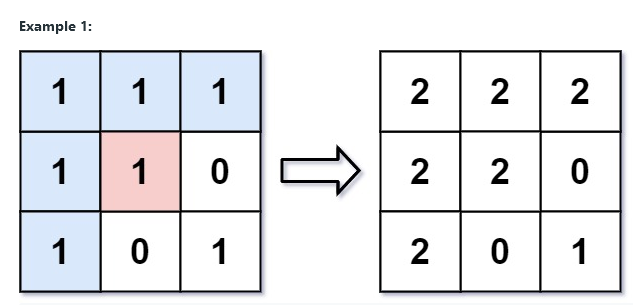

Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, newColor = 2
Output: [[2,2,2],[2,2,0],[2,0,1]]
Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.



In [ ]:
from typing import List

def dfs(image: List[List[int]], sr: int, sc: int, new_color: int, source: int):

  if sr < 0 or sr >= len(image) or sc < 0 or sc >= len(image[0]) \
    or image[sr][sc] != source:
    return
  image[sr][sc] = new_color

  dfs(image, sr-1, sc, new_color, source) # TOP
  dfs(image, sr+1, sc, new_color, source) # DOWN
  dfs(image, sr, sc-1, new_color, source) # LEFT
  dfs(image, sr, sc+1, new_color, source) # RIGHT

def floor_fill(image: List[List[int]], sr: int, sc: int, new_color: int) -> List[List[int]]:
  """

  """
  if new_color == image[sr][sc]:
    return image
  rows = len(image)
  columns = len(image[0])
  source = image[sr][sc]
  dfs(image, sr, sc, new_color, source)


In [ ]:
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
new_color = 2
floor_fill(image, sr, sc, new_color)
print(image)


image = [[0,0,0],[0,0,0]]
sr = 0
sc = 0
new_color = 2
floor_fill(image, sr, sc, new_color)
print(image)


[[2, 2, 2], [2, 2, 0], [2, 0, 1]]
[[2, 2, 2], [2, 2, 2]]


##**Task12: Single element in a sorted array**

You are given a sorted array consisting of only integers where every element appears exactly twice, except for one element which appears exactly once.

Return the single element that appears only once.

Your solution must run in O(log n) time and O(1) space.

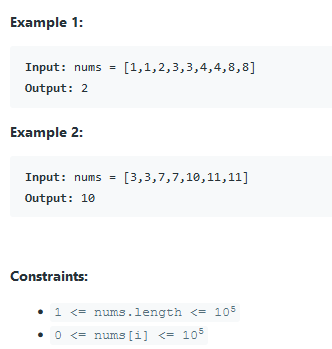

*   List item
*   List item



In [ ]:
from typing import List

def single_non_duplicate(nums: List[int]) -> int:
  """
  
  """
  # Edge Case when the list is empty
  if not nums: 
    return -1 
  elif len(nums) == 1:
    return nums[0]
  
  # Settung up two pointers
  start, end = 0, len(nums) - 1

  while start <= end:
    mid  = start + (end - start) // 2 
    # If an element found 
    if nums[mid] != nums[mid-1] and nums[mid] != nums[mid+1]:
      return nums[mid]
    elif (mid%2==0 and nums[mid]==nums[mid-1]) or (mid%2==1 and nums[mid]==nums[mid+1]):
        end = mid - 1
    else:
        start = mid + 1

In [ ]:
print(single_non_duplicate([1,1,2,3,3,4,4,8,8]))
print(single_non_duplicate([3,3,7,7,10,11,11]))

2
10


##**Task13: Remove K digits | Build lowest number**

Given string num representing a non-negative integer num, and an integer k, return the smallest possible integer after removing k digits from num.

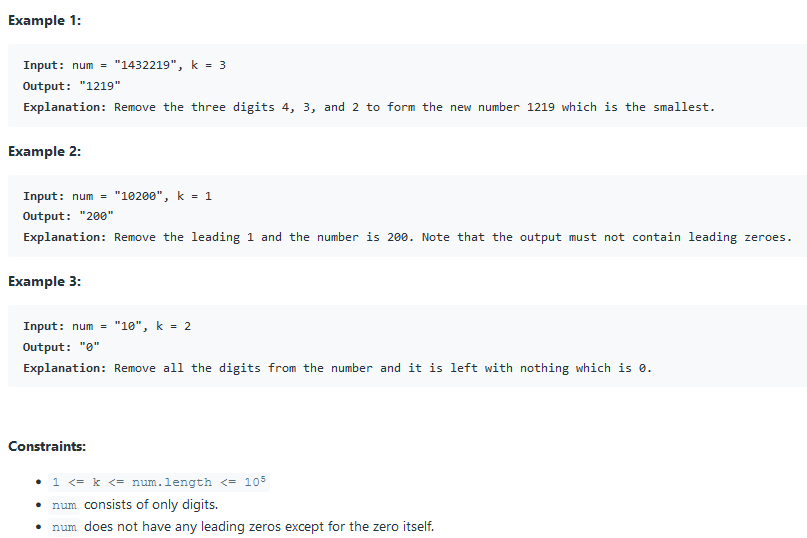

In [ ]:
def remove_k_digits(nums: str, k: int) -> str:
  n = len(nums)
  stack = list()

  # Iterate over each element
  for num in nums:
    # Remove from stask if stack is not empty, k is greater than 0 and the number 
    # in stack is greater than next value (deep direction) 
    while stack and k > 0 and stack[-1] > num:
      stack.pop()
      k -= 1
    
    # Add to the stack not leading zeros
    if (stack and num == '0') or num != '0' :
      stack.append(num)

  # If K number is not zero , remove from the top of the stack
  while stack and k > 0 :
    stack.pop()
    k -= 1
  
  # Return 0 if stack is an empty
  if not stack:
    return '0'
  return ''.join(stack)

In [ ]:
print(remove_k_digits('1432219', 3))
print(remove_k_digits('10200', 1))
print(remove_k_digits('10', 2))

1219
200
0


##**Task13: Implement Trie**

A trie (pronounced as "try") or prefix tree is a tree data structure used to efficiently store and retrieve keys in a dataset of strings. There are various applications of this data structure, such as autocomplete and spellchecker.

Implement the Trie class:

    Trie() Initializes the trie object.
    void insert(String word) Inserts the string word into the trie.
    boolean search(String word) Returns true if the string word is in the trie (i.e., was inserted before), and false otherwise.
    boolean startsWith(String prefix) Returns true if there is a previously inserted string word that has the prefix prefix, and false otherwise.


In [32]:
class Node:
  """
    Node in the Trie
  """
  def __init__(self, value):
    self.val = value
    self.child = {}
    self.end = False

class Trie:
  def __init__(self):
    self.root = Node('/')

  def insert(self, word: str) -> None:
    """
      Insert the word to the Trie
    """
    pointer = self.root
    for char in word:
      if not pointer.child.get(char, False):
        pointer.child[char] = Node(char)
      pointer = pointer.child[char]
    pointer.end = True

  def search(self, word: str) -> bool:
    """
      Search for a word in the Trie. If all characters are found and 
      end variable set to True, then the word is found. 
    """
    pointer = self.root
    for char in word:
      if not pointer.child.get(char, False):
        return False 
      pointer = pointer.child[char]
    if not pointer.end:
      return False
    return True

  def starts_with(self, prefix: str) -> bool:
    """
      Look for the prefix in the Trie
    """
    pointer = self.root
    for char in prefix:
      if not pointer.child.get(char, False):
        return False
      pointer = pointer.child[char]
    return True

In [33]:
trie = Trie()
trie.insert('apple')
print(trie.search('apple'))    # Return True
print(trie.search('app'))      # Return False
print(trie.starts_with('app')) # Return True
trie.insert('app')
print(trie.search('app'))      # Return True

True
False
True
True


##**Task14: Maximum Sum Circular**

Given a circular integer array nums of length n, return the maximum possible sum of a non-empty subarray of nums.

A circular array means the end of the array connects to the beginning of the array. Formally, the next element of nums[i] is nums[(i + 1) % n] and the previous element of nums[i] is nums[(i - 1 + n) % n].

A subarray may only include each element of the fixed buffer nums at most once. Formally, for a subarray nums[i], nums[i + 1], ..., nums[j], there does not exist i <= k1, k2 <= j with k1 % n == k2 % n.

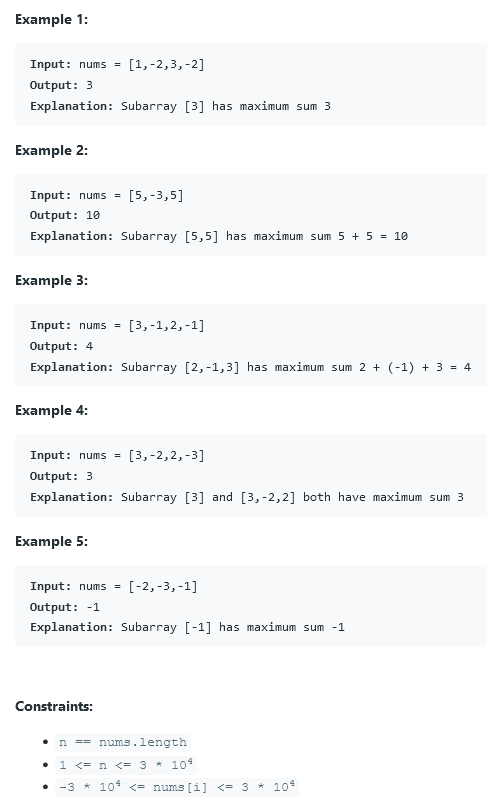

In [62]:
def maximumn_sum_circular_subarray(nums: list) -> int:
  """

  """
  reverted_nums = [num * -1 for num in nums]
  max_subarray = float("-inf")
  tmp_max_sum, total_sum = 0, 0

  for num in reverted_nums:
    print(total_sum, tmp_max_sum, max_subarray)
    total_sum += num
    tmp_max_sum += num
    if tmp_max_sum > max_subarray and num < tmp_max_sum:
      max_subarray = tmp_max_sum
    else:
      tmp_max_sum = num
    print(total_sum, tmp_max_sum, max_subarray)
  return -(total_sum - max_subarray)

In [63]:
# print(maximumn_sum_circular_subarray([5, -3, -2, 6, -1, 4]))
print(maximumn_sum_circular_subarray([1,-2,3,-2]))


0 0 -inf
-1 -1 -inf
-1 -1 -inf
1 2 -inf
1 2 -inf
-2 -1 -1
-2 -1 -1
0 2 -1
-1
